Step 1: Read CSV Data

In [1]:
import pandas as pd

df = pd.read_csv(r"C:\vaibhavi_upgrade\PYTHON_PROJECT\home_insurance_dataset.csv")


In [2]:
df.head(10)

,Policy_ID,Home_Value,Home_Age,Location,Coverage_Type,Claim_History,Risk_Rating,Premium_Amount
0,1,6923388,24,Semi-Urban,Basic,No,High,16861.388
1,2,7050634,14,Urban,Premium,Yes,Low,18011.634
2,3,4804572,32,Urban,Premium,No,Medium,20264.572
3,4,2734489,46,Semi-Urban,Basic,No,Low,16425.489
4,5,7704212,43,Urban,Premium,Yes,Low,24798.212
5,6,4972471,16,Semi-Urban,Premium,No,Low,15157.471
6,7,5023669,4,Rural,Standard,Yes,Low,10315.669
7,8,7904852,37,Rural,Standard,No,Low,20925.852
8,9,5481505,21,Rural,Basic,No,Low,11781.505
9,10,2266891,14,Semi-Urban,Basic,No,Medium,10289.891


Step 2: Understand Dataset Structure

In [3]:
df.shape

(1000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Policy_ID       1000 non-null   int64  
 1   Home_Value      1000 non-null   int64  
 2   Home_Age        1000 non-null   int64  
 3   Location        1000 non-null   object 
 4   Coverage_Type   1000 non-null   object 
 5   Claim_History   1000 non-null   object 
 6   Risk_Rating     1000 non-null   object 
 7   Premium_Amount  1000 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 62.6+ KB


In [5]:
df.describe()

,Policy_ID,Home_Value,Home_Age,Premium_Amount
count,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,500.500000,5.164687e+06,25.378000,16098.309849
std,288.819436,2.656073e+06,14.044941,4241.894584
min,1.000000,5.393530e+05,1.000000,4049.087000
25%,250.750000,2.956326e+06,13.000000,13024.173500
50%,500.500000,5.097948e+06,25.000000,16051.649000
75%,750.250000,7.370068e+06,37.000000,19097.345250
max,1000.000000,9.996563e+06,49.000000,27577.404000


Step 3: Identify Important Features
Common important features:

Home_Value

Home_Age

Location

Claim_History

Coverage_Type

Risk_Rating

Premium_Amount (Target)

Step 4: Handle Missing Values

In [6]:
df.isnull().sum()

Policy_ID         0
Home_Value        0
Home_Age          0
Location          0
Coverage_Type     0
Claim_History     0
Risk_Rating       0
Premium_Amount    0
dtype: int64

In [7]:
df['Home_Age'].fillna(df['Home_Age'].median(),inplace=True)
df['Claim_History'].fillna(df['Claim_History'].mode()[0],inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_11840\3621106571.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Home_Age'].fillna(df['Home_Age'].median(),inplace=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_11840\3621106571.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

Step 5: Remove Duplicates

In [8]:
df.drop_duplicates(inplace=True)

Exploratory Data Analysis (EDA)
- Step 6: Univariate Analysis (Single Variable)

- Premium Distribution

In [9]:
import seaborn as sns  
import matplotlib.pyplot as plt



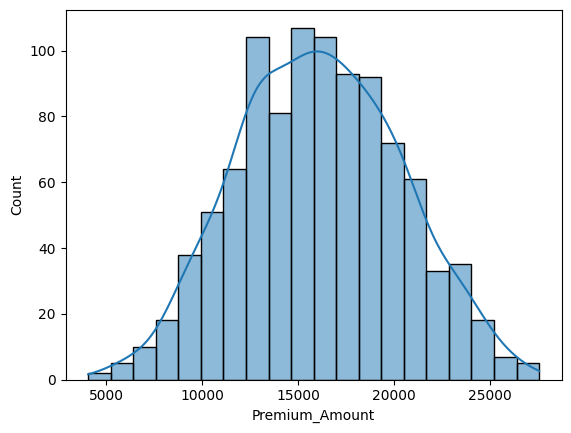

In [10]:
sns.histplot(df['Premium_Amount'],kde=True)
plt.show()

- Coverage Type Count

<Axes: xlabel='Coverage_Type', ylabel='count'>

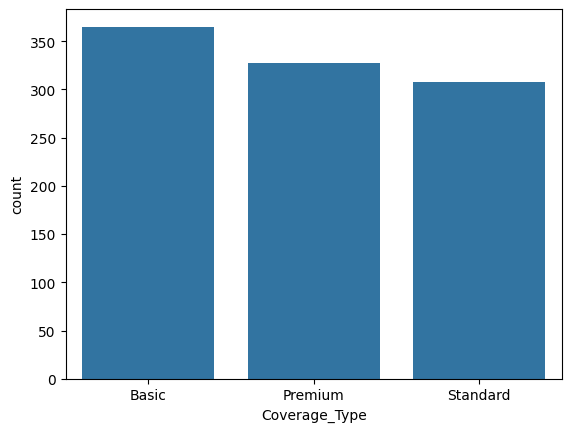

In [11]:
sns.countplot(x='Coverage_Type',data=df)

Bivariate Analysis (Premium vs Other Features)
🔸 Premium vs Home Value

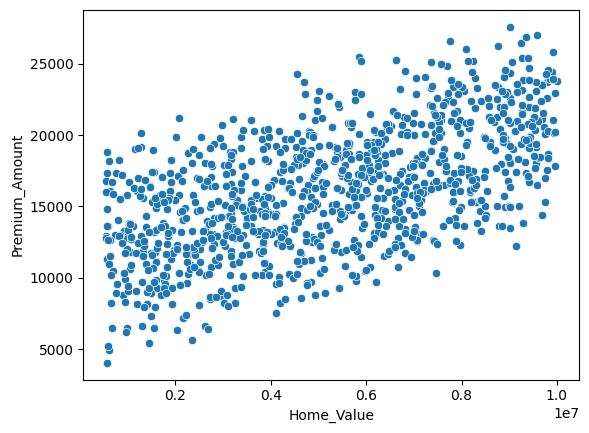

In [12]:
sns.scatterplot(x='Home_Value', y='Premium_Amount', data=df)
plt.show()


- Premium vs Claim History

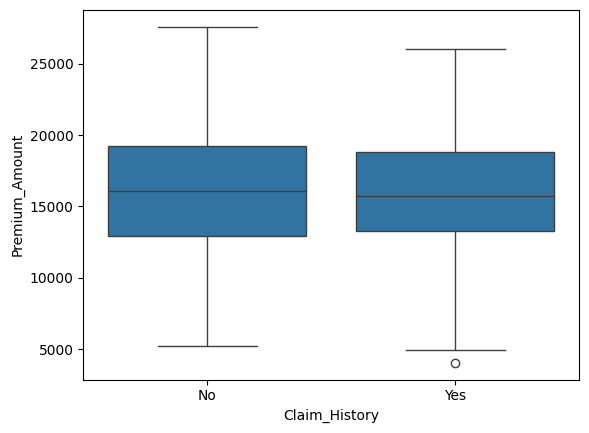

In [13]:
sns.boxplot(x='Claim_History', y='Premium_Amount', data=df)
plt.show()


Correlation Analysis

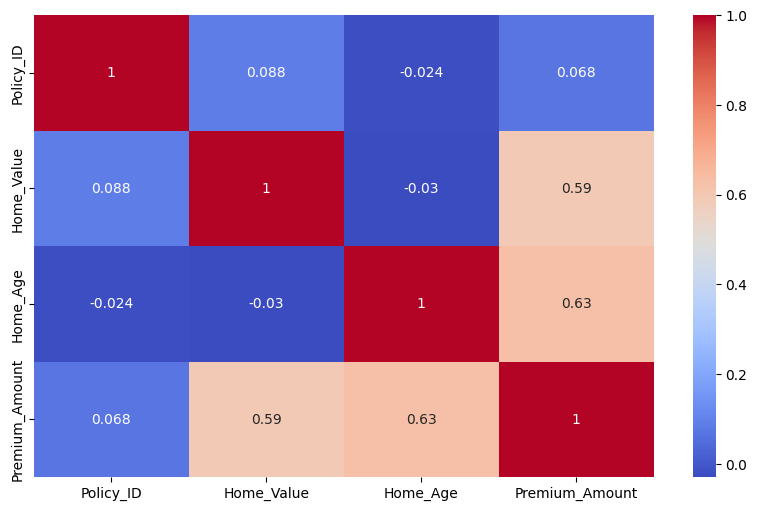

In [14]:

plt.figure(figsize=(10,6))
numeric_df=df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


Subsetting  Data 
- Step 9: Create Subsets
-  Subset by Coverage Type

In [15]:
premium_coverage = df[df['Coverage_Type'] == 'Premium']
basic_coverage = df[df['Coverage_Type'] == 'Basic']


Subset by Risk Rating

In [16]:
high_risk = df[df['Risk_Rating'] == 'High']
low_risk = df[df['Risk_Rating'] == 'Low']


In [17]:
df

,Policy_ID,Home_Value,Home_Age,Location,Coverage_Type,Claim_History,Risk_Rating,Premium_Amount
0,1,6923388,24,Semi-Urban,Basic,No,High,16861.388
1,2,7050634,14,Urban,Premium,Yes,Low,18011.634
2,3,4804572,32,Urban,Premium,No,Medium,20264.572
3,4,2734489,46,Semi-Urban,Basic,No,Low,16425.489
4,5,7704212,43,Urban,Premium,Yes,Low,24798.212
...,...,...,...,...,...,...,...,...
995,996,9236347,16,Urban,Premium,Yes,Medium,20571.347
996,997,9360935,42,Urban,Premium,No,Medium,26843.935
997,998,8167105,36,Rural,Standard,No,Low,20907.105
998,999,3194946,30,Semi-Urban,Standard,Yes,Medium,14132.946


Business Insights 

- Premium is strongly influenced by:

Home value

Claim history

Risk rating

Coverage type

- Less impact:

Home age

Location (moderate)

- What segment of customers are more likely to agree to pay a higher premium?
- What segments are we having difficulties with insurance payments?

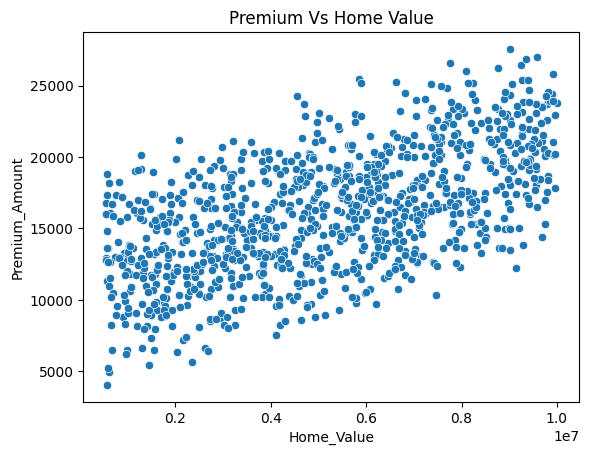

In [18]:
# Premium Vs Home Value

sns.scatterplot(x='Home_Value', y='Premium_Amount',data=df)
plt.title('Premium Vs Home Value')
plt.show()

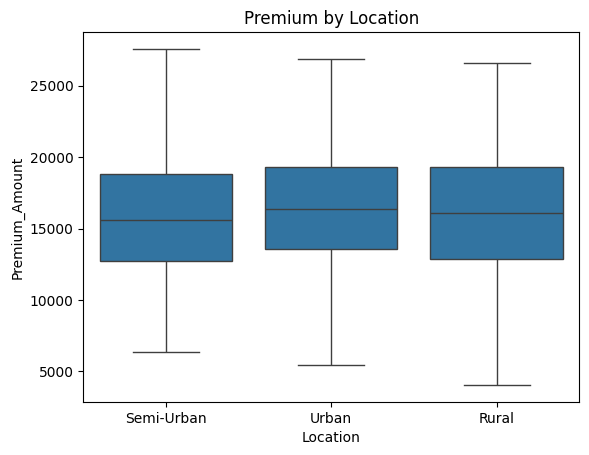

In [19]:
sns.boxplot(x='Location',y='Premium_Amount',data=df)
plt.title('Premium by Location')
plt.show()

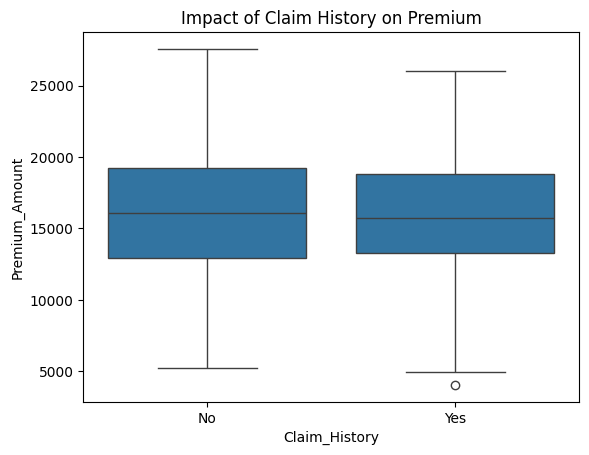

In [20]:
sns.boxplot(x='Claim_History',y='Premium_Amount',data=df)
plt.title('Impact of Claim History on Premium')
plt.show()